ライブラリのインポート

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

学習データの生成

In [0]:
N = 101 #刻み幅
P = 3 #学習周期
x = np.linspace(0, P* 2*np.pi, N)
y = np.sin(x)

正規化&正の整数値化

In [0]:
input_bit = 6 #6bitの整数値が最大値128
Max = pow(2, input_bit)

y = Max * y

In [5]:
base_data = y + 64
base_data = base_data.astype(np.int16)
print(base_data)

[ 64  75  87  98 107 115 121 125 127 127 124 120 113 104  94  83  72  59
  48  36  26  17   9   4   1   0   1   4   9  17  26  36  48  59  72  83
  94 104 113 120 124 127 127 125 121 115 107  98  87  75  64  52  40  29
  20  12   6   2   0   0   3   7  14  23  33  44  55  68  79  91 101 110
 118 123 126 128 126 123 118 110 101  91  79  68  55  44  33  23  14   7
   3   0   0   2   6  12  20  29  40  52  63]


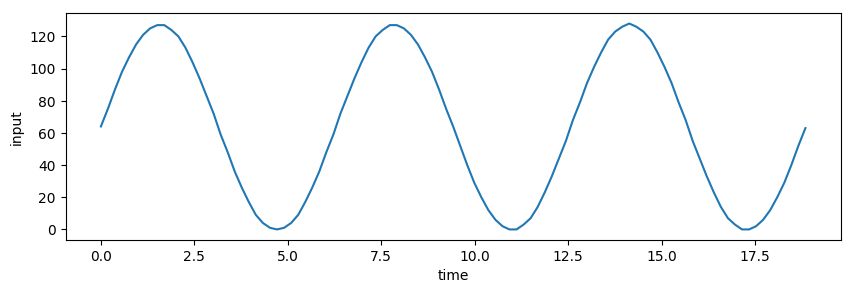

In [6]:
fig = plt.figure(figsize=(10,3), dpi=100, facecolor='w')
ax1 = fig.add_subplot(1,1,1)
plt.xlabel("time")
plt.ylabel("input")
ax1.plot(x, base_data)
plt.show()

入力データを見やすくプロット

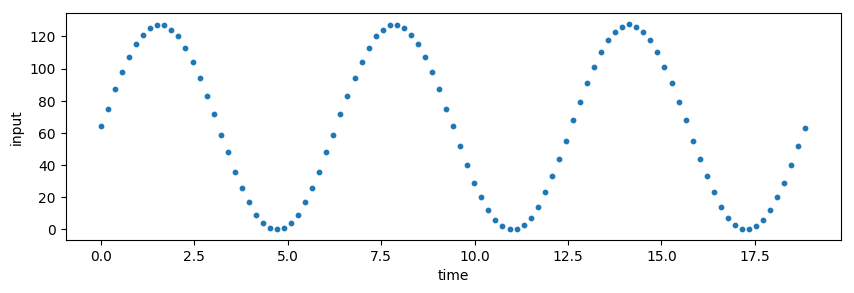

In [7]:
fig = plt.figure(figsize=(10,3), dpi=100, facecolor='w')
ax1 = fig.add_subplot(1,1,1)
plt.xlabel("time")
plt.ylabel("input")
ax1.scatter(x, base_data, s=10)
plt.show()

入力と教師値に分割

In [0]:
input_data = base_data[:100]
target = base_data[1:]

In [19]:
print(input_data, '入力値')
print(target, '教師値')

[ 64  75  87  98 107 115 121 125 127 127 124 120 113 104  94  83  72  59
  48  36  26  17   9   4   1   0   1   4   9  17  26  36  48  59  72  83
  94 104 113 120 124 127 127 125 121 115 107  98  87  75  64  52  40  29
  20  12   6   2   0   0   3   7  14  23  33  44  55  68  79  91 101 110
 118 123 126 128 126 123 118 110 101  91  79  68  55  44  33  23  14   7
   3   0   0   2   6  12  20  29  40  52] 入力値
[ 75  87  98 107 115 121 125 127 127 124 120 113 104  94  83  72  59  48
  36  26  17   9   4   1   0   1   4   9  17  26  36  48  59  72  83  94
 104 113 120 124 127 127 125 121 115 107  98  87  75  64  52  40  29  20
  12   6   2   0   0   3   7  14  23  33  44  55  68  79  91 101 110 118
 123 126 128 126 123 118 110 101  91  79  68  55  44  33  23  14   7   3
   0   0   2   6  12  20  29  40  52  63] 教師値


仮にすべての出力を入力と同一にした際の適応度

In [9]:
differ = input_data - target
sum(abs(differ))

763

ディレクトリをGoogleDriveに移動

In [10]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import sys
sys.path.append('/content/gdrive/My Drive/SinPre')

データビット列化のためのモジュールインポート

In [12]:
import pulse_bitshift_sin as bit
import importlib
importlib.reload(bit)

<module 'pulse_bitshift_sin' from '/content/gdrive/My Drive/SinPre/pulse_bitshift_sin.py'>

ビット列化

In [13]:
input_bit = bit.rate_cut(len(input_data), 128, input_data)

[0, 64, 32, 96, 16, 80, 48, 112, 8, 72, 40, 104, 24, 88, 56, 120, 4, 68, 36, 100, 20, 84, 52, 116, 12, 76, 44, 108, 28, 92, 60, 124, 2, 66, 34, 98, 18, 82, 50, 114, 10, 74, 42, 106, 26, 90, 58, 122, 6, 70, 38, 102, 22, 86, 54, 118, 14, 78, 46, 110, 30, 94, 62, 126, 1, 65, 33, 97, 17, 81, 49, 113, 9, 73, 41, 105, 25, 89, 57, 121, 5, 69, 37, 101, 21, 85, 53, 117, 13, 77, 45, 109, 29, 93, 61, 125, 3, 67, 35, 99, 19, 83, 51, 115, 11, 75, 43, 107, 27, 91, 59, 123, 7, 71, 39, 103, 23, 87, 55, 119, 15, 79, 47, 111, 31, 95, 63, 127]


In [14]:
number = 56
print('元のデータ{}\n 変換ビット{}\n 1の数{}'.format(base_data[number], input_bit[number], sum(input_bit[number])))

元のデータ6
 変換ビット[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 1の数6


学習段階

In [15]:
import pulseNetClass3layer_re as pl
importlib.reload(pl)

<module 'pulseNetClass3layer_re' from '/content/gdrive/My Drive/SinPre/pulseNetClass3layer_re.py'>

インスタンスの作成

In [0]:
learning = pl.NNpulse(10, 128, 127)#def __init__(self, DE_num, All_clock, Normalization_max):

インスタンスの初期化&入力値と教師値決定

In [0]:
learning.set_init(1,20,1)
learning.input_decision(0, 0, np.array(input_bit), np.array(target))

学習する

In [18]:
learning.DE_epoc(1, 500)

0 ループ目解析中、進行率 0.0 %
ただいまの適応度 [8089, 6351, 6351, 6351, 3359, 6351, 6351, 6351, 1138, 6351]
0 ループ目解析中、進行率 1.0 %
ただいまの適応度 [3624, 6246, 6323, 3990, 3178, 4987, 6351, 782, 1138, 6351]
0 ループ目解析中、進行率 2.0 %
ただいまの適応度 [3624, 6246, 3367, 866, 1737, 4984, 6351, 782, 1138, 6259]
0 ループ目解析中、進行率 3.0 %
ただいまの適応度 [3624, 3580, 1349, 866, 1737, 3558, 6351, 782, 846, 6109]
0 ループ目解析中、進行率 4.0 %
ただいまの適応度 [796, 3580, 1349, 866, 1737, 3558, 6351, 782, 768, 4610]
0 ループ目解析中、進行率 5.0 %
ただいまの適応度 [776, 2187, 1349, 866, 1737, 3558, 6351, 782, 768, 3337]
0 ループ目解析中、進行率 6.0 %
ただいまの適応度 [776, 2187, 1349, 866, 1737, 3558, 6351, 782, 768, 1576]
0 ループ目解析中、進行率 7.0 %
ただいまの適応度 [776, 783, 1349, 866, 1737, 3558, 6348, 782, 762, 1576]
0 ループ目解析中、進行率 8.0 %
ただいまの適応度 [776, 783, 1349, 866, 935, 3558, 3036, 782, 762, 1576]
0 ループ目解析中、進行率 9.0 %
ただいまの適応度 [776, 783, 1349, 866, 935, 3558, 1490, 782, 762, 1576]
0 ループ目解析中、進行率 10.0 %
ただいまの適応度 [776, 768, 1349, 866, 935, 3370, 1293, 782, 762, 1576]
0 ループ目解析中、進行率 11.0 %
ただいまの適応度 [776, 768, 1349, 866

(array([[  2,  -1, -14,  12,  -7, -10,  14, -18,  -1,  -3,  -7,  14,   0,
         -25,  -8,  -2,   2,   0,  -8,  10],
        [-16,  -6, -26,   8, -33,  -6,  12,  10,  -1,  -7,  -2,  19, -10,
         -24,  -4,   0,  12,  -4,   9, -17],
        [-26,  -7,  21,  -9,  14,  -3,  12,   0,  -8,   4,   2,  16,   3,
          -8,   5,  -2,  -1,  -9,   2,  24],
        [-43,   0, -23,  12,  20, -10,   4,   0,  22, -13, -13,   4, -19,
           3, -20, -29,  27,  -2, -15,  -2],
        [ 69,  50,   6,   8, -45,   1,  21, -21, -20,   7, -15,  13,   8,
          17,  27,  -5,  -4,   3,   9,  28],
        [-31,  31,   4,   9,  -6,   0,   9,  -3,  -3,  15, -17,  19,  -8,
         -38,   3, -25,  18, -15, -11, -15],
        [ 30, -22, -17,   9,   8,  -1,  23, -14, -16,   6,  -4,  19,   2,
         -27, -14,  11,   1, -12, -14,   8],
        [-10,  17,  26,  -1, -31,  -5,   9, -24,  12,   3,  -3,  14, -11,
          -9, -13,  14,  10, -11,   5, -20],
        [ 33,  24, -10,   0, -24, -10, -11,  16,